In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config
from osus_dataset import OSUSDataset
from util import get_csv_data, train, generate, generate_conversation, generate_conversation_base_model
import numpy as np
import matplotlib.pyplot as plt
import torch

DATA_DIR = '../data_dir'
MODEL_DIR = 'model_dir'
SAVED_MODEL_PREFIX = 'bigboi'

# Importing the Model

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Importing the Test Dataset

In [4]:
train_data = get_csv_data(os.path.join(DATA_DIR, 'train'))

In [5]:
train_data[0]

"Blue\tcrewmate\tHey crewmates, I've called this meeting 'cause I found Red's lifeless bod in Communications! We gotta figure out who the imposter is ASAP and send them packing out the airlock!\nYellow\tcrewmate\tOMG, not Red! I was doing tasks in O2, didn't see anything suspicious. Who was closest to Communications?\nGreen\timposter\tWow, that's crazy! I was actually in the Cockpit doing some tasks, so unfortunately I don't have any information on who could have done it. But we definitely need to figure this out and get rid of the imposter before they take any more innocent crewmates out!\nBlue\tcrewmate\tGuys, we need to start voting and skip if we don't have enough information. We can't afford to lose any more crewmates. Red's death is tragic, but we need to focus on finding the imposter and vote them out.\nYellow\tcrewmate\tI can vouch for Green, I saw them doing tasks in the Cockpit when the emergency meeting was called. We should skip for now and keep an eye on anyone acting susp

In [6]:
train_dataset = OSUSDataset(train_data, tokenizer, 1024) # OSUSDataset Obj

# Training the Model

In [7]:
model, loss_history = train(train_dataset, 
                  model, 
                  batch_size=1,
                  epochs=20, 
                  lr=2e-5,
                  output_dir=MODEL_DIR,
                  output_prefix=SAVED_MODEL_PREFIX,
                  save_model_on_epoch=True,
                  save_best_model=True
                  )

dataset <osus_dataset.OSUSDataset object at 0x7f060c77eeb0>


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Loss: 0


Iteration: 473it [00:51,  9.17it/s]
Epoch:   5%|▌         | 1/20 [00:57<18:11, 57.45s/it]

Loss: tensor(1.3870, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.55it/s]
Epoch:  10%|█         | 2/20 [01:49<16:21, 54.52s/it]

Loss: tensor(1.8308, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:50,  9.43it/s]
Epoch:  15%|█▌        | 3/20 [02:43<15:17, 53.99s/it]

Loss: tensor(1.7311, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.50it/s]
Epoch:  20%|██        | 4/20 [03:36<14:17, 53.58s/it]

Loss: tensor(1.7711, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:50,  9.40it/s]
Epoch:  25%|██▌       | 5/20 [04:29<13:22, 53.53s/it]

Loss: tensor(1.7019, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:50,  9.46it/s]
Epoch:  30%|███       | 6/20 [05:22<12:26, 53.35s/it]

Loss: tensor(1.6842, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.55it/s]
Epoch:  35%|███▌      | 7/20 [06:15<11:31, 53.17s/it]

Loss: tensor(1.8480, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:52,  9.08it/s]
Epoch:  40%|████      | 8/20 [07:11<10:47, 53.95s/it]

Loss: tensor(1.6170, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.56it/s]
Epoch:  45%|████▌     | 9/20 [08:03<09:48, 53.54s/it]

Loss: tensor(1.9544, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:50,  9.37it/s]
Epoch:  50%|█████     | 10/20 [08:57<08:55, 53.58s/it]

Loss: tensor(1.6646, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.51it/s]
Epoch:  55%|█████▌    | 11/20 [09:50<08:00, 53.34s/it]

Loss: tensor(1.6630, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.49it/s]
Epoch:  60%|██████    | 12/20 [10:43<07:06, 53.32s/it]

Loss: tensor(1.8190, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:51,  9.26it/s]
Epoch:  65%|██████▌   | 13/20 [11:38<06:15, 53.71s/it]

Loss: tensor(1.5138, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:49,  9.48it/s]
Epoch:  70%|███████   | 14/20 [12:31<05:21, 53.51s/it]

Loss: tensor(2.0536, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:53,  8.76it/s]
Epoch:  75%|███████▌  | 15/20 [13:27<04:32, 54.45s/it]

Loss: tensor(1.6045, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:53,  8.84it/s]
Epoch:  80%|████████  | 16/20 [14:24<03:40, 55.08s/it]

Loss: tensor(1.7196, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:51,  9.15it/s]
Epoch:  85%|████████▌ | 17/20 [15:19<02:45, 55.01s/it]

Loss: tensor(1.7238, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:51,  9.26it/s]
Epoch:  90%|█████████ | 18/20 [16:13<01:49, 54.75s/it]

Loss: tensor(1.5829, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:55,  8.56it/s]
Epoch:  95%|█████████▌| 19/20 [17:11<00:55, 55.71s/it]

Loss: tensor(2.0995, device='cuda:0', grad_fn=<NllLossBackward0>)


Iteration: 473it [00:55,  8.58it/s]
Epoch: 100%|██████████| 20/20 [18:10<00:00, 54.51s/it]


# Visualizing the Data

In [8]:
loss_history = np.array(loss_history)
epoch_nums = np.arange(1, len(loss_history) + 1)

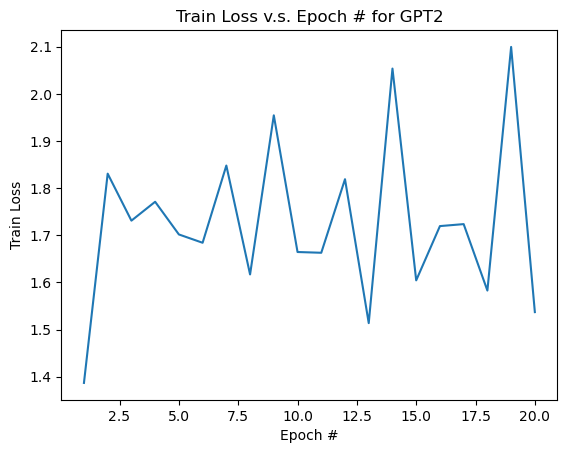

In [9]:
plt.xlabel('Epoch #')
plt.ylabel('Train Loss')
plt.title('Train Loss v.s. Epoch # for GPT2')
plt.plot(epoch_nums, loss_history)

# Importing Best Model

In [10]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.load_state_dict(torch.load('model_dir/bigboi-best-2.pt'))

<All keys matched successfully>

# Comparing Best Model vs Regular GPT2 Accuracy using Auto-evaluation Metrics

In [11]:
from nltk.translate import bleu_score, meteor_score, nist_score
# perplexity, LSA

In [18]:
regular_model = GPT2LMHeadModel.from_pretrained('gpt2')

In [19]:
test_data = get_csv_data(os.path.join(DATA_DIR, 'test'))
test_dataset = OSUSDataset(test_data, tokenizer, 1024) # OSUSDataset Obj

In [20]:
def get_imposter_in_sentence(sentence: str):
    sent_list = sentence.split('\n')
    for sent in sent_list:
        if (sent.split('\t')[1] == 'imposter'):
            return sent.split('\t')[0]
        
def get_dead_player(sentence: str):
    remaining_players = ['Red', 'Green', 'Blue', 'Yellow']
    sent_list = sentence.split('\n')
    for sent in sent_list[:3]:
        remaining_players.remove(sent.split('\t')[0])
        
    return remaining_players[0]
        
test_data_info = [(x.split('\n')[0].split('\t')[0], get_imposter_in_sentence(x), get_dead_player(x)) for x in test_data]

In [15]:
generated_test_data = [generate_conversation(model, tokenizer, x[0], x[1], x[2]) for x in test_data_info]

100%|██████████| 1/1 [00:14<00:00, 14.04s/it]


In [16]:
bleu_scores = [bleu_score.sentence_bleu([' '.join(' '.join(test_point.split('\n')).split('\t'))], ' '.join(' '.join(gen_point.split('\n')).split('\t'))) for test_point, gen_point in zip(test_data, generated_test_data)]
nist_scores = [nist_score.sentence_nist([' '.join(' '.join(test_point.split('\n')).split('\t'))], ' '.join(' '.join(gen_point.split('\n')).split('\t'))) for test_point, gen_point in zip(test_data, generated_test_data)]
meteor_scores = [meteor_score.meteor_score([' '.join(' '.join(test_point.split('\n')).split('\t')).split(' ')], ' '.join(' '.join(gen_point.split('\n')).split('\t')).split(' ')) for test_point, gen_point in zip(test_data, generated_test_data)]

In [17]:
print('Avg. Bleu Score:', sum(bleu_scores) / len(bleu_scores))
print('Avg. Nist Score:', sum(nist_scores) / len(nist_scores))
print('Avg. Meteor Score:', sum(meteor_scores) / len(meteor_scores))

Avg. Bleu Score: 0.3803303417370919
Avg. Nist Score: 4.274787529730134
Avg. Meteor Score: 0.20351046487047342


In [21]:
generated_test_data_base_model = [generate_conversation_base_model(regular_model, tokenizer, x[0], x[1], x[2]) for x in test_data_info]

100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


In [22]:
bleu_scores_base = [bleu_score.sentence_bleu([' '.join(' '.join(test_point.split('\n')).split('\t'))], ' '.join(' '.join(gen_point.split('\n')).split('\t'))) for test_point, gen_point in zip(test_data, generated_test_data_base_model)]
nist_scores_base = [nist_score.sentence_nist([' '.join(' '.join(test_point.split('\n')).split('\t'))], ' '.join(' '.join(gen_point.split('\n')).split('\t'))) for test_point, gen_point in zip(test_data, generated_test_data_base_model)]
meteor_scores_base = [meteor_score.meteor_score([' '.join(' '.join(test_point.split('\n')).split('\t')).split(' ')], ' '.join(' '.join(gen_point.split('\n')).split('\t')).split(' ')) for test_point, gen_point in zip(test_data, generated_test_data_base_model)]

In [23]:
print('Avg. Bleu Score:', sum(bleu_scores_base) / len(bleu_scores_base))
print('Avg. Nist Score:', sum(nist_scores_base) / len(nist_scores_base))
print('Avg. Meteor Score:', sum(meteor_scores_base) / len(meteor_scores_base))

Avg. Bleu Score: 0.1344068345739159
Avg. Nist Score: 0.6807598465835745
Avg. Meteor Score: 0.12838766810720675


In [16]:
generate_conversation_base_model(model, tokenizer, 'Red', 'Blue', 'Yellow')

100%|██████████| 1/1 [00:23<00:00, 23.88s/it]


"Red\tcrewmate\tI didn't know you were there, but I'm glad I didn't.\nGreen\tcrewmate\tI'm not a fan of walking around with a toy on my person, but I think the fact that the developers were careful enough to not give me any specific information before making my decision doesn't make me an anti-gamer. But I think that's a fair point and I agree with Hanayama that it's important to be clear about what we're saying and keeping the conversation civil. I have a lot of respect for the devs and they didn't provide any information before making the decision.\nBlue\timposter\tKiller Whale!\nRed\tcrewmate\tYou think I'm a rednecks chump?\nGreen\tcrewmate\tI think I'm in my early thirties. I think I'm being careful with my brain. I don't have a clue who I am, but I'm good. I was just getting off a flight and I didn't see anyone around. It's unfortunate, but I'm just doing my job and I'm not drunk or anything. I'm not doing anything bad, so I'm fine.\nBlue\timposter\tAh, well, I understand that I 